# Credit Fraud Classification

### 1. Introduction



> ### Context
> It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
> 
> ### Content
> 
> The datasetset contains transactions made by credit cards in September 2013 by European cardholders.
> This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
> 
> It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
> 
> Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### 2. Dataset

Dataset: https://www.kaggle.com/code/gollasivakrishna/credit-card-fraud-detection/data

In [1]:
import os
import time
import pprint
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression


In [2]:
# load data
dataset = pd.read_csv('./credit_fraud.csv')

### 3. Data preprocessing

In [3]:
dataset.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8689,11779.0,-1.322735,-0.527584,1.613915,-1.690692,-1.791939,1.119810,2.844867,-0.884837,2.556572,...,-0.122660,0.540556,-0.044576,-0.447218,0.835269,-0.664120,-0.148783,-0.496638,567.00,0
225631,144329.0,2.050358,0.143017,-2.083149,0.382479,0.577863,-1.006239,0.303912,-0.345488,0.591372,...,0.165058,0.619024,-0.136122,-0.838759,0.339770,-0.054870,-0.002064,-0.031902,29.88,0
215062,139920.0,1.875225,-1.719242,-0.015737,-0.793032,-1.387081,1.069756,-1.617781,0.369319,0.730638,...,-0.389476,-0.476843,0.271006,0.291601,-0.695808,1.127283,-0.027756,-0.034461,104.90,0
163339,115858.0,1.959458,-1.264153,-1.830607,-1.123144,-0.229221,-0.259064,-0.375001,-0.141392,-0.659856,...,0.531301,1.138711,-0.187535,0.145347,0.193777,0.047811,-0.075423,-0.050417,155.85,0
271136,164426.0,1.537321,-0.711591,-2.744636,0.702832,0.551092,-0.361732,0.431232,-0.080935,0.866963,...,-0.042106,-0.508500,-0.285446,-1.351258,0.137422,-0.263887,-0.044794,0.011700,269.51,0
200081,133275.0,2.060703,-0.111969,-1.078747,0.426953,-0.224233,-1.239221,0.127565,-0.287425,0.669409,...,-0.298327,-0.767055,0.351342,0.023082,-0.328359,0.198207,-0.076305,-0.061637,1.98,0
273609,165631.0,1.223505,-1.696564,-2.984778,-0.531237,0.113736,-1.320710,1.344952,-0.671827,0.429753,...,0.408328,0.141535,-0.449911,0.694682,0.169151,0.774915,-0.233647,0.003014,507.40,0
264394,161407.0,2.050320,-0.027572,-1.445749,0.146226,0.296519,-0.718506,0.171461,-0.240665,0.276600,...,0.283110,0.985036,-0.062169,-0.413120,0.295521,-0.100167,-0.017074,-0.072161,1.79,0
206259,136140.0,-5.683415,-9.018860,-2.812787,1.039836,1.535705,-2.959472,-0.016917,0.305489,-1.404989,...,1.728286,0.995694,2.302422,-0.014861,-1.565299,-0.355263,0.024759,-0.663286,914.24,0
89863,62759.0,-1.967508,2.205106,-2.667060,0.124250,1.724592,3.506045,-2.055326,-0.517733,-1.200572,...,-1.173093,0.264900,0.284481,0.859094,0.060386,-0.326067,-0.260437,-0.141288,1.00,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# dataset.dropna(inplace=True)

In [7]:
# d = dataset.convert_dtypes()

### 4. Data EDA

##### Dataset Balance

In [8]:
value_counts = dataset['Class'].value_counts().sort_index()
pie_data =  value_counts.values
pie_labels = value_counts.index

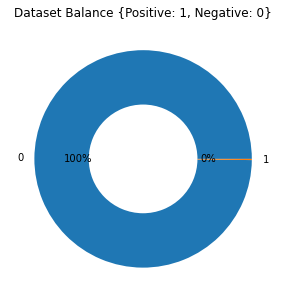

In [9]:
plt.figure(figsize = (5,5))
plt.title('Dataset Balance {Positive: 1, Negative: 0}')
plt.pie(pie_data, labels=pie_labels, autopct = '%0.0f%%', wedgeprops=dict(width=0.5))
plt.show()

In [10]:
print(value_counts)

0    284315
1       492
Name: Class, dtype: int64


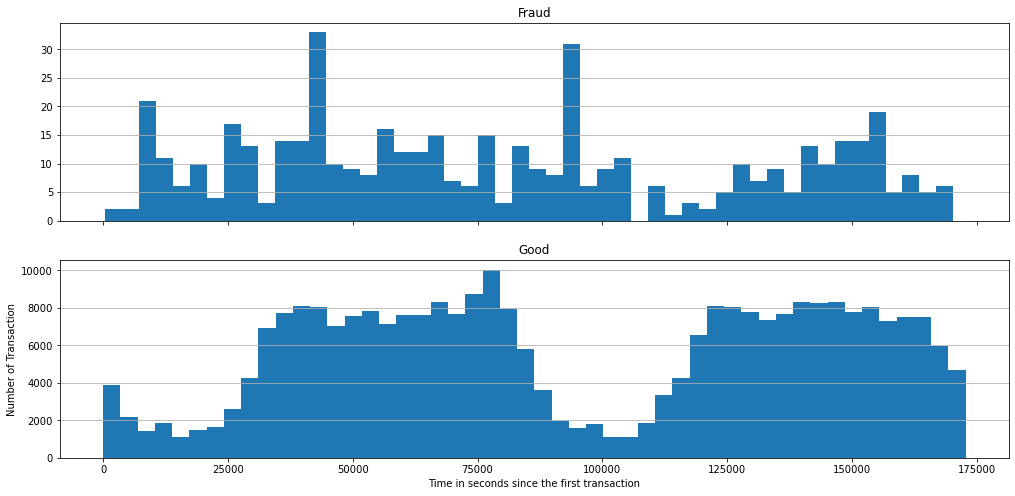

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(17,8))
bins = 50
ax1.hist(dataset.Time[dataset.Class == 1], bins=bins)
ax1.set_title('Fraud')
ax1.grid(axis='y', which='major')
ax2.hist(dataset.Time[dataset.Class == 0], bins=bins)
ax2.set_title('Good')
ax2.grid(axis='y', which='major')
plt.xlabel('Time in seconds since the first transaction')
plt.ylabel('Number of Transaction')
plt.show()

### Feature Engineering

In [12]:
# Normalize the feature Amount
dataset['Amount_norm'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))

### Data Modeling

#### train_test_split

In [13]:
Y = dataset.Class.tolist()
X = dataset.drop(['Time','Amount','Class'], axis=1)


In [14]:
training_x, testing_x, training_y, testing_y = train_test_split (X, Y, test_size = 0.3)

#### initialize model

In [15]:
classifier = LogisticRegression()

In [16]:
def start_training(classifier, training_x, training_y):
    training_start_time = time.time()
    print(f'Training is started at Epoch Time in Second: {training_start_time}')

    classifier.fit(training_x, training_y)

    training_end_time = time.time()
    print(f'Training is ended at Epoch Time in Second: {training_end_time}')

    training_time = training_end_time - training_start_time
    return classifier, training_time

#### model training

In [17]:
clf, t = start_training(classifier, training_x, training_y)
print(f'Training is elapsed for {t:.3} seconds')

Training is started at Epoch Time in Second: 1653418214.1240196
Training is ended at Epoch Time in Second: 1653418217.2400277
Training is elapsed for 3.12 seconds


#### model testing

In [18]:
predicted_y = clf.predict(testing_x)

In [19]:
# confusion matrix
cm = confusion_matrix(testing_y, predicted_y)

In [20]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(
            j, i, cm[i, j],
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > thresh else 'black'
        )
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

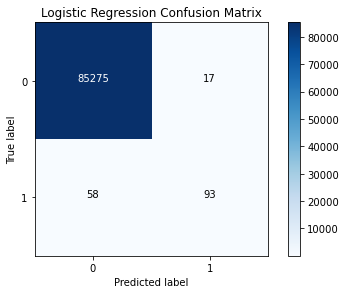

In [21]:
# show our confusion matrix
label = [0, 1]
plot_confusion_matrix(cm, classes=label, title='Logistic Regression Confusion Matrix')

In [22]:
# calculate the score
score_y = clf.decision_function(testing_x)  
print(score_y)

[ -8.82194977  -9.79196068 -10.21849713 ...  -9.82835386 -10.24586029
 -11.46667725]


### Evaluate Result

In [23]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
f1 = (precision*recall)/(precision+recall) *2
print(f'F1 score: {f1:.3f}')


Precision: 0.845
Recall: 0.616
F1 score: 0.713


In [24]:
# validate accuracy_score, = (tp+tn)/(tp+fn+fp+tn)

accuracy = (tp+tn)/(tp+fn+fp+tn)
print(f'Accuracy by hand: {accuracy:.3f}')

score = accuracy_score(testing_y, predicted_y)
print(f'Accuracy by accuracy_score: {score:.3f}')

Accuracy by hand: 0.999
Accuracy by accuracy_score: 0.999


In [25]:
precision, recall, thresholds = precision_recall_curve(testing_y, score_y)

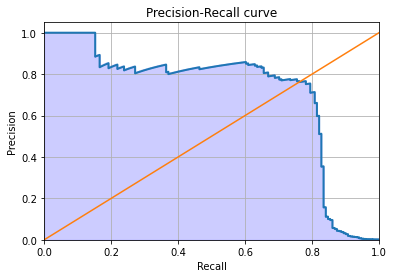

In [26]:
# Precision-Call curve
plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
plt.plot(recall, precision, linewidth=2)
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
x=np.linspace(0,1,100)
y=x
plt.plot(x, y)
plt.grid()
plt.show()

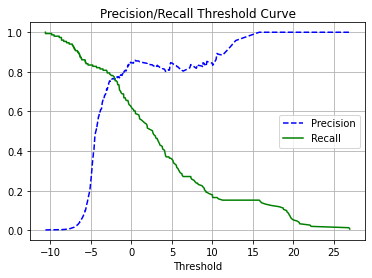

In [27]:
# diagram of Precision/Recall over threshold, illustrating the relation of Precision/Recall and threshold
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.title('Precision/Recall Threshold Curve')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()


In [28]:
print(classification_report(testing_y, predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.85      0.62      0.71       151

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



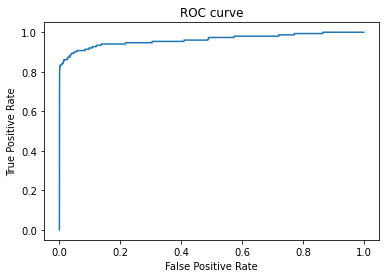

In [29]:
# ROC curve
y_pred_proba = classifier.predict_proba(testing_x)[::,1]
fpr, tpr, _ = roc_curve(testing_y,  y_pred_proba)

# create ROC curve
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
auc = roc_auc_score(testing_y, y_pred_proba)
print(f'AUC is {auc:.3f}')

AUC is 0.962
